<a href="https://colab.research.google.com/github/harsha-123-minn/car-price-prediction/blob/main/car_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compressionratio horsepower  peakrpm citympg  \

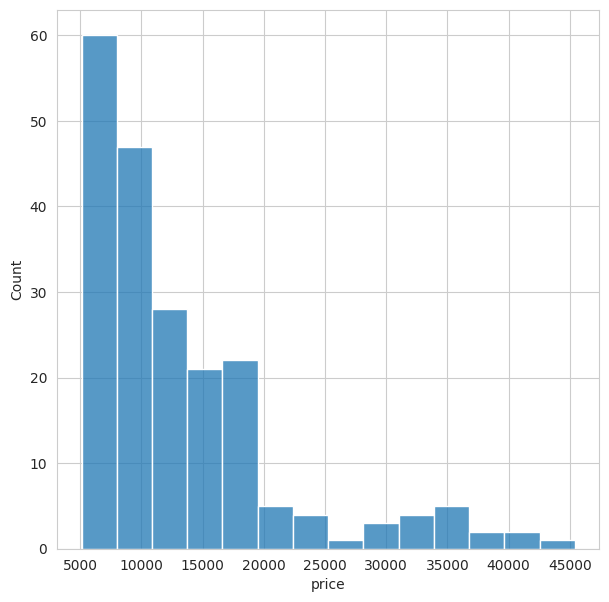

In [9]:
cars=pd.read_csv("/content/CarPrice.csv")
print(cars.head())
print(cars.info())
print(cars.describe())
sns.set_style("whitegrid")
plt.figure(figsize=(7,7))
sns.histplot(cars.price)
plt.show()

In [10]:
X = cars[['symboling', 'fueltype', 'aspiration', 'doornumber','carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength','carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber','enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio','horsepower', 'peakrpm', 'citympg', 'highwaympg']]
y = cars['price']
# subset all categorical variables
cat_var = X.select_dtypes(include=['object'])
# convert into dummies
dum_var = pd.get_dummies(cat_var, drop_first=True)
# drop categorical variables
X = X.drop(list(cat_var.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, dum_var], axis=1)

In [11]:
# scaling the features
from sklearn.preprocessing import scale
# In scaling the dataframe is converted to a numpy array
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns
# split into train and test
#from sklearn. import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7,test_size = 0.3, random_state=100)

In [12]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
prediction=pd.DataFrame(predictions)

In [13]:
from sklearn.metrics import r2_score
print(r2_score(y_true=y_test, y_pred=predictions))

0.8302670552596088


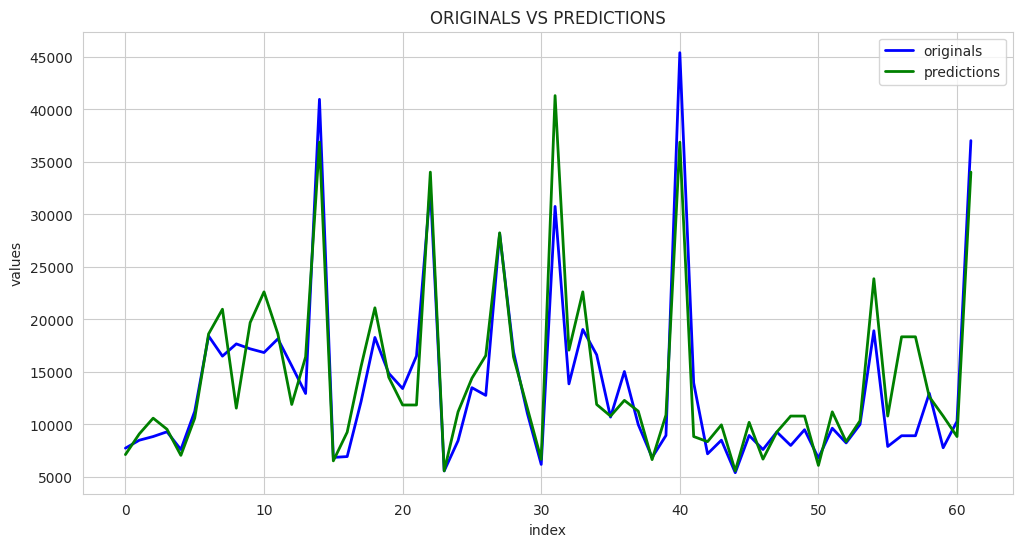

In [14]:
test_index=y_test.reset_index()["price"]
ax=test_index.plot(label="originals",figsize=(12,6),linewidth=2,color="b")
ax=prediction[0].plot(label = "predictions",figsize=(12,6),linewidth=2,color="g")
plt.legend(loc='upper right')
plt.title("ORIGINALS VS PREDICTIONS")
plt.xlabel("index")
plt.ylabel("values")
plt.show()